# **VGG-16 FOR CT SCAN IMAGES**

In [ ]:
from google.colab import drive #mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16 #loading vgg16 model

In [ ]:
base_model = VGG16(input_shape = (224, 224, 3), #using imagenet weights
include_top = False, 
weights = 'imagenet')

80134624/80134624 [==============================] - 5s 0us/step


In [ ]:
for layer in base_model.layers: 
    layer.trainable = False

In [ ]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
#defining model architecture
x = keras.layers.Flatten()(base_model.output)
x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(base_model.input, x)

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
model.compile(optimizer = Adam(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
!unzip "/content/drive/MyDrive/CTfull" #unzipping dataset mounted on Drive

Streaming output truncated to the last 5000 lines.
  inflating: CTfull/train/normal/nCT5067.jpg  
  inflating: __MACOSX/CTfull/train/normal/._nCT5067.jpg  
  inflating: CTfull/train/normal/nCT1229.jpg  
  inflating: __MACOSX/CTfull/train/normal/._nCT1229.jpg  
  inflating: CTfull/train/normal/nCT5729.jpg  
  inflating: __MACOSX/CTfull/train/normal/._nCT5729.jpg  
  inflating: CTfull/train/normal/nCT6234.jpg  
  inflating: __MACOSX/CTfull/train/normal/._nCT6234.jpg  
  inflating: CTfull/train/normal/nCT7894.jpg  
  inflating: __MACOSX/CTfull/train/normal/._nCT7894.jpg  
  inflating: CTfull/train/normal/nCT2734.jpg  
  inflating: __MACOSX/CTfull/train/normal/._nCT2734.jpg  
  inflating: CTfull/train/normal/nCT6963.jpg  
  inflating: __MACOSX/CTfull/train/normal/._nCT6963.jpg  
  inflating: CTfull/train/normal/nCT8782.jpg  
  inflating: __MACOSX/CTfull/train/normal/._nCT8782.jpg  
  inflating: CTfull/train/normal/nCT2287.jpg  
  inflating: __MACOSX/CTfull/train/normal/._nCT2287.jpg  
  in

In [ ]:
#importing libraries
import cv2
import pandas as pd
import os
import numpy as np
import cv2
import PIL
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
images=[]
labels=[]

In [ ]:
a="/content/CTfull/train/covid/" #path for covid positive training set

In [ ]:
for item in os.listdir(a):
    c=str(a+item)
    img = cv2.imread(c) 
    

    width = 224
    height = 224
    dim = (width, height)
    try:
        resized = cv2.resize(img, dim , interpolation=cv2.INTER_AREA)

    except:
        break
        print("b")
    images.append(resized)
    labels.append("1")
    
for item in os.listdir("/content/CTfull/train/normal/"): #path for covid negative training set
    img = cv2.imread("/content/CTfull/train/normal/"+item) 
    width=224
    height=224
    dim=(width,height)
    try:
        res = cv2.resize(img, dim , interpolation=cv2.INTER_AREA)
       
    except:
        print("b")
        break
    images.append(res)
    labels.append("0")

In [ ]:
images=np.asarray(images) #converting to numpy array

In [ ]:
labels=np.asarray(labels)

In [ ]:
trainy=labels.astype("uint8")

In [ ]:
#creating a df from arrays to shuffle in the next steps
df = pd.DataFrame(list(zip(images, labels)), 
               columns =['Image', 'Label'])

In [ ]:
#shuffling the df
from sklearn.utils import shuffle
df = shuffle(df)

In [ ]:
#converting them back to arrays

In [ ]:
trainx=df["Image"]

In [ ]:
trainy=df["Label"]

In [ ]:
trainx=np.asarray(trainx)

In [ ]:
traindata=[]
for i in range (len(trainx)):
    trx=trainx[i]
    traindata.append(trx)

In [ ]:
traindata=np.asarray(traindata)

In [ ]:
traindata.shape

(3000, 224, 224, 3)

In [ ]:
trainy=np.asarray(trainy)

In [ ]:
trainy=trainy.astype("uint8")

In [ ]:
#training the vgg model
vgg_hist_ct=model.fit(traindata, trainy, epochs=40, validation_split=0.1)

Epoch 1/40
85/85 [==============================] - 30s 206ms/step - loss: 4.6207 - acc: 0.9289 - val_loss: 0.1318 - val_acc: 0.9967
Epoch 2/40
85/85 [==============================] - 15s 182ms/step - loss: 0.6730 - acc: 0.9833 - val_loss: 0.8091 - val_acc: 0.9767
Epoch 3/40
85/85 [==============================] - 15s 173ms/step - loss: 0.7589 - acc: 0.9830 - val_loss: 6.9046e-06 - val_acc: 1.0000
Epoch 4/40
85/85 [==============================] - 15s 178ms/step - loss: 0.7196 - acc: 0.9848 - val_loss: 0.1569 - val_acc: 0.9967
Epoch 5/40
85/85 [==============================] - 16s 189ms/step - loss: 0.4465 - acc: 0.9889 - val_loss: 0.0285 - val_acc: 0.9967
Epoch 6/40
85/85 [==============================] - 16s 184ms/step - loss: 0.4776 - acc: 0.9911 - val_loss: 0.0599 - val_acc: 0.9967
Epoch 7/40
85/85 [==============================] - 16s 183ms/step - loss: 0.2091 - acc: 0.9956 - val_loss: 0.2315 - val_acc: 0.9967
Epoch 8/40
85/85 [==============================] - 16s 185ms/ste

In [ ]:
a="/content/CTfull/test/covid/" #path for covid positive test images

In [ ]:
images=[]
labels=[]

In [ ]:
#repeating the same process as previous steps on the test data
for item in os.listdir(a): 
    c=str(a+item)
    img = cv2.imread(c) 
    

    width = 224
    height = 224
    dim = (width, height)
    try:
        resized = cv2.resize(img, dim , interpolation=cv2.INTER_AREA)

    except:
        break
        print("b")
    images.append(resized)
    labels.append("1")

for item in os.listdir("/content/CTfull/test/normal/"):
    img = cv2.imread("/content/CTfull/test/normal/"+item) 
    width=224
    height=224
    dim=(width,height)
    try:
        res = cv2.resize(img, dim , interpolation=cv2.INTER_AREA)
       
    except:
        print("b")
        break
    #res=cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    #r=res.flatten()
    images.append(res)
    labels.append("0")

In [ ]:
#repeating the same process as above for the testing set

In [ ]:
images=np.asarray(images)

In [ ]:
images.shape

(1000, 224, 224, 3)

In [ ]:
labels=np.asarray(labels)

In [ ]:
labels.shape

(1000,)

In [ ]:
testy=labels.astype("uint8")

In [ ]:
dframe = pd.DataFrame(list(zip(images, labels)), 
               columns =['Image', 'Label'])

In [ ]:
from sklearn.utils import shuffle
dframe = shuffle(dframe)

In [ ]:
testx=dframe["Image"]  

In [ ]:
testy=dframe["Label"]

In [ ]:
testx=np.asarray(testx)

In [ ]:
testdata=[]
for i in range(len(testx)):
  tsx=testx[i]
  testdata.append(tsx)

In [ ]:
testdata=np.asarray(testdata)

In [ ]:
testdata.shape

(1000, 224, 224, 3)

In [ ]:
testy=np.asarray(testy)

In [ ]:
testy=testy.astype("uint8")

In [ ]:
score = model.evaluate(testdata, testy, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 1.080760266080684e-23
Test accuracy: 1.0


In [ ]:
predictions = model.predict(testdata)

32/32 [==============================] - 5s 144ms/step


In [ ]:
preds=[]
for i in range(len(predictions)):
  if(predictions[i]>=0.5):
    preds.append(int("1"))
  else:
    preds.append(int("0"))

In [ ]:
preds=np.array(preds)

In [ ]:
ctr=0
for i in range(len(preds)):
  if(preds[i]!=testy[i]):
    ctr=ctr+1
print(ctr)

0


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

In [ ]:
precision = precision_score(testy, preds)

In [ ]:
matrix = confusion_matrix(testy, preds)

In [ ]:
print(precision)

0.998003992015968


In [ ]:
print(matrix)

[[499   1]
 [  0 500]]


In [ ]:
recall = recall_score(testy, preds)

In [ ]:
print(recall)

1.0


In [ ]:
f1=f1_score(testy, preds)

In [ ]:
print(f1)

0.9990009990009989


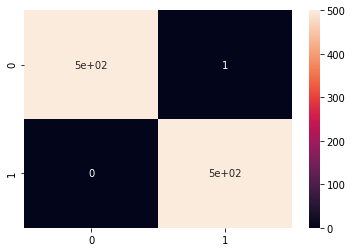

In [ ]:
import seaborn as sns
sns.heatmap(matrix, annot=True)

In [ ]:
kappa = cohen_kappa_score(testy, preds)
print('Cohens kappa: %f' % kappa)

Cohens kappa: 0.998000
